### Simple UNet

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/CVPro/train_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: clips/0313-1/24060/19.jpg  
  inflating: clips/0313-1/24060/18.jpg  
  inflating: clips/0313-1/24060/17.jpg  
  inflating: clips/0313-1/24060/16.jpg  
  inflating: clips/0313-1/24060/15.jpg  
  inflating: clips/0313-1/24060/14.jpg  
  inflating: clips/0313-1/24060/13.jpg  
  inflating: clips/0313-1/24060/12.jpg  
  inflating: clips/0313-1/24060/11.jpg  
  inflating: clips/0313-1/24060/10.jpg  
  inflating: clips/0313-1/24060/9.jpg  
  inflating: clips/0313-1/24060/8.jpg  
  inflating: clips/0313-1/24060/7.jpg  
  inflating: clips/0313-1/24060/6.jpg  
  inflating: clips/0313-1/24060/5.jpg  
  inflating: clips/0313-1/24060/4.jpg  
  inflating: clips/0313-1/24060/3.jpg  
  inflating: clips/0313-1/24060/2.jpg  
  inflating: clips/0313-1/24060/1.jpg  
   creating: clips/0313-1/12320/
  inflating: clips/0313-1/12320/20.jpg  
  inflating: clips/0313-1/12320/19.jpg  
  inflating: clips/0313-1/12320/18.jpg  
  inflating: clips/0313

**Initialization**

In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Generate Masks

In [ ]:
%matplotlib inline

json_gt = [json.loads(line) for line in open('/content/label_data_0601.json')]
print(np.shape(json_gt))

image_names = []
mask_names = []

for i in range(np.shape(json_gt)[0]):
    gt = json_gt[i]
    gt_lanes = gt['lanes']
    y_samples = gt['h_samples']
    raw_file = gt['raw_file']
    address = '/content/'+raw_file
    image_names.append(address)
    image = plt.imread(address)
    #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

    #print(np.shape(image))
    #image = image.resize((200, 200,3))
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
    # Create an empty mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    # Draw a rectangle on the mask
    for lane in gt_lanes_vis:
        for pt in lane:
            cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

    mask = mask.astype(np.uint8)
    #print(np.shape(mask))

    tosave = Image.fromarray(mask)
    mask_add = '/content/Masks/'+raw_file[11:30]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)

json_gt = [json.loads(line) for line in open('/content/label_data_0313.json')]
print(np.shape(json_gt))

for i in range(np.shape(json_gt)[0]):
    gt = json_gt[i]
    gt_lanes = gt['lanes']
    y_samples = gt['h_samples']
    raw_file = gt['raw_file']
    address = '/content/'+raw_file
    image_names.append(address)
    image = plt.imread(address)
    #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

    #print(np.shape(image))
    #image = image.resize((200, 200,3))
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
    # Create an empty mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    # Draw a rectangle on the mask
    for lane in gt_lanes_vis:
        for pt in lane:
            cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

    mask = mask.astype(np.uint8)
    #print(np.shape(mask))

    tosave = Image.fromarray(mask)
    if len(raw_file) == 22:
        mask_add = '/content/Masks/'+raw_file[13:15]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 23:
        mask_add = '/content/Masks/'+raw_file[13:16]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 24:
        mask_add = '/content/Masks/'+raw_file[13:17]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 25:
        mask_add = '/content/Masks/'+raw_file[13:18]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)
    elif len(raw_file) == 26:
        mask_add = '/content/Masks/'+raw_file[13:19]+'.png'
        mask_names.append(mask_add)
        tosave.save(mask_add)


print(np.shape(image_names))
print(np.shape(mask_names))

(410,)
(2858,)
(3268,)
(3268,)


# Select Dataset

In [ ]:
num_images = 500

image_names_subset = image_names[0:num_images]
images = [cv2.resize(cv2.imread(img), dsize=(320, 180), interpolation=cv2.INTER_CUBIC) for img in image_names_subset]
#images = cv2.resize(images, dsize=(200, 200), interpolation=cv2.INTER_CUBIC)

image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 4)

mask_names_subset = mask_names[0:num_images]
masks = [cv2.resize(cv2.imread(mask, 0), dsize=(320, 180), interpolation=cv2.INTER_NEAREST) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (500, 180, 320, 3, 1)
Mask data shape is:  (500, 180, 320, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


**Normalization**

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

**Train / Test Split**

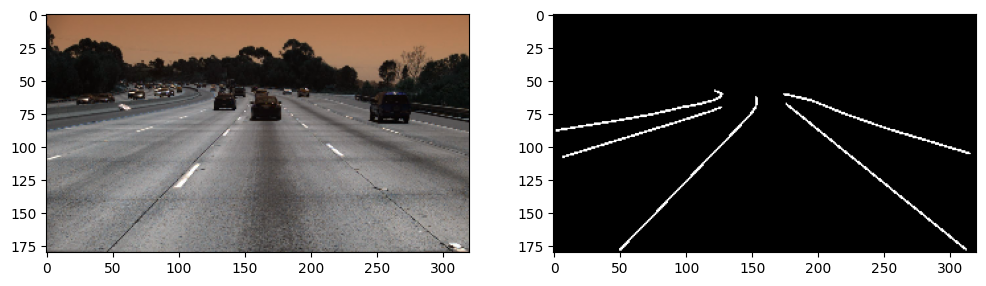

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,:,0])
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

# UNet


In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

def resize_like(input_tensor, ref_tensor): # resizes input tensor wrt. ref_tensor
    H, W = ref_tensor.get_shape()[1], ref_tensor.get_shape()[2]
    return tf.image.resize(input_tensor, [H, W])

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = resize_like(x, skip_features)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model
     


# Input Size

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(input_shape)

(180, 320, 3)


# Define Precision, Recall and F-1 Score Metrics

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Compile UNet

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy',f1_m])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 180, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 180, 320, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

# Train UNet

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 20, 
                    verbose=1, 
                    epochs=30, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/30
20/20 [==============================] - 64s 1s/step - loss: 0.4219 - accuracy: 0.8448 - f1_m: 0.0183 - val_loss: 40890.3516 - val_accuracy: 0.0233 - val_f1_m: 0.0373
Epoch 2/30
20/20 [==============================] - 24s 1s/step - loss: 0.1544 - accuracy: 0.9802 - f1_m: 1.7036e-04 - val_loss: 1714.6637 - val_accuracy: 0.0503 - val_f1_m: 0.0380
Epoch 3/30
20/20 [==============================] - 24s 1s/step - loss: 0.1218 - accuracy: 0.9807 - f1_m: 1.7703e-05 - val_loss: 71.0153 - val_accuracy: 0.1284 - val_f1_m: 0.0390
Epoch 4/30
20/20 [==============================] - 25s 1s/step - loss: 0.1101 - accuracy: 0.9808 - f1_m: 0.0000e+00 - val_loss: 1.5864 - val_accuracy: 0.5032 - val_f1_m: 0.0527
Epoch 5/30
20/20 [==============================] - 24s 1s/step - loss: 0.1015 - accuracy: 0.9808 - f1_m: 0.0000e+00 - val_loss: 0.2490 - val_accuracy: 0.9677 - val_f1_m: 5.3434e-04
Epoch 6/30
20/20 [==============================] - 24s 1s/step - loss: 0.0947 - accuracy: 0.9808 - f1

# Save Model

In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/500image30epochs20batch.hdf5')

# Plot Loss and Accuracy

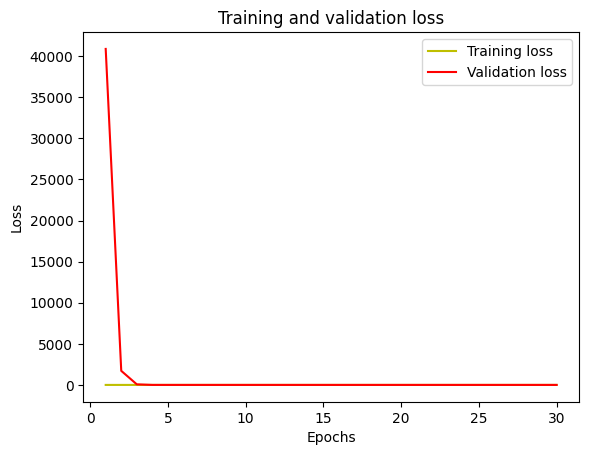

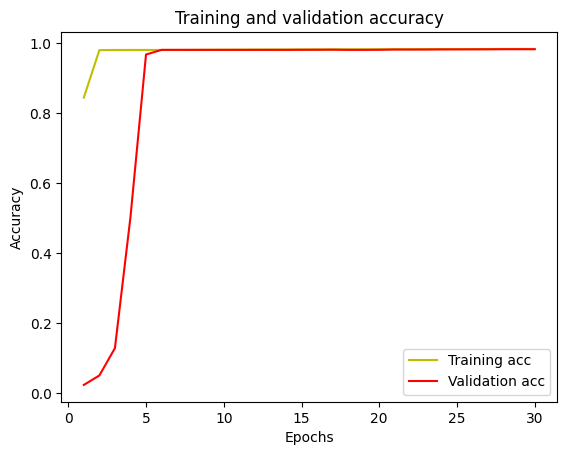

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Load Model

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/saved_models/500image30epochs25batch.hdf5", compile=False)

# Evaluate Model

In [ ]:
#Prediction
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

4/4 [==============================] - 18s 1s/step


**IoU Metric**

In [ ]:
from tensorflow.keras.metrics import MeanIoU

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.59920186


# Test Network

(1, 180, 320, 3, 1)
1/1 [==============================] - 0s 21ms/step


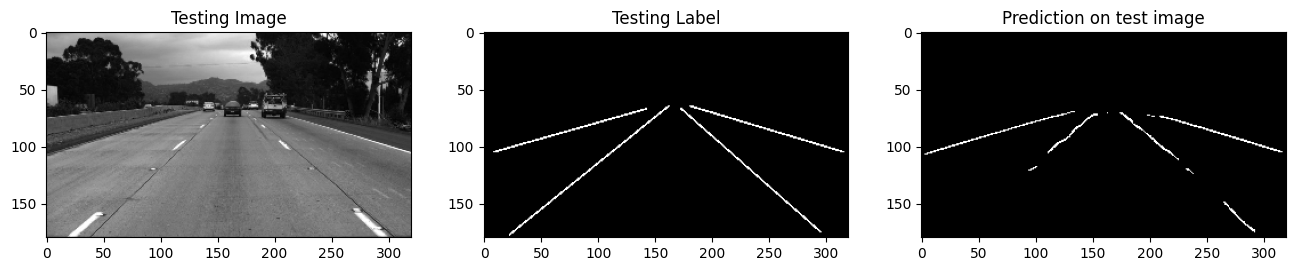

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
#target = []
#[a,b] = np.shape(prediction[:,:])
#for i in range(a):
#  for j in range(b):
#    if prediction[i,j] >=0:
#      target.append([i,j])
#    else:
#      continue
#for lane in prediction>0:
#  for pt in lane:
#cv2.polylines(prediction, np.int32([target]), isClosed=False, color=(255,255,255), thickness=5)

#print(target)
#print(prediction.shape)

plt.figure(figsize=(16, 8))
#plt.figure(figsize=(5, 10))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()